<a href="https://colab.research.google.com/github/onecme/dataMining/blob/main/TI09_ElyasRandiRenaldi_0110223277_PratikumMandiri2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# library yang dipakai

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/messy_classification_data.csv')

In [4]:
df

,Age,Salary,Work Hours Per Week,Gender,Education Level
0,56.0,99504.0,40.0,F,Bachelor
1,69.0,37490.0,26.0,Male,PhD
2,46.0,39173.0,57.0,Male,Phd
3,32.0,30376.0,45.0,Male,Bachelor
4,60.0,NaN,49.0,Female,Bachelor
...,...,...,...,...,...
9995,58.0,25646.0,50.0,Male,High School
9996,23.0,74045.0,40.0,Male,Master
9997,41.0,66925.0,51.0,Female,High School
9998,44.0,63927.0,33.0,Male,PhD


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  9800 non-null   float64
 1   Salary               9853 non-null   float64
 2   Work Hours Per Week  10000 non-null  float64
 3   Gender               10000 non-null  object 
 4   Education Level      10000 non-null  object 
dtypes: float64(3), object(2)
memory usage: 390.8+ KB


In [6]:
df.isnull().sum()

,0
Age,200
Salary,147
Work Hours Per Week,0
Gender,0
Education Level,0


In [7]:
df['Gender'].unique()

array(['F', 'Male', 'Female', 'malee', 'Femael', 'M'], dtype=object)

In [8]:
df['Education Level'].unique()

array(['Bachelor', 'PhD', 'Phd', 'High School', 'Master', 'Bchelor',
       'HighSchoool', 'Mastr'], dtype=object)

##**Membersihkan Data**

In [9]:
# Mengubah text menjadi numeric
replacements = {
    'Gender': {'F': 0, 'Male' : 1, 'Female': 0, 'malee': 1, 'Femael': 0,'M': 1, },
    'Education Level': {'HighSchoool': 0, 'High School': 0, 'Bachelor': 1, 'Bchelor': 1, 'Master': 2, 'Mastr': 2, 'PhD': 3, 'Phd': 3}
}

df.replace(replacements, inplace=True)

<ipython-input-9-fdb7a25af894>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(replacements, inplace=True)


In [10]:
df['Gender'].unique()

array([0, 1])

In [11]:
df['Education Level'].unique()

array([1, 3, 0, 2])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  9800 non-null   float64
 1   Salary               9853 non-null   float64
 2   Work Hours Per Week  10000 non-null  float64
 3   Gender               10000 non-null  int64  
 4   Education Level      10000 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [13]:
# Menghitung jumlah data yang duplikasi
df.duplicated().sum()

2

In [14]:
print(df[df.duplicated()])

       Age  Salary  Work Hours Per Week  Gender  Education Level
3413  38.0     NaN                 43.0       1                0
7726  38.0     NaN                 49.0       1                2


In [15]:
df = df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

In [17]:
# Menghapus nilai nan atau null
df = df.dropna()

In [18]:
df.isnull().sum()

,0
Age,0
Salary,0
Work Hours Per Week,0
Gender,0
Education Level,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9657 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  9657 non-null   float64
 1   Salary               9657 non-null   float64
 2   Work Hours Per Week  9657 non-null   float64
 3   Gender               9657 non-null   int64  
 4   Education Level      9657 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 452.7 KB


In [20]:
df.describe()

,Age,Salary,Work Hours Per Week,Gender,Education Level
count,9657.000000,9657.000000,9657.000000,9657.000000,9657.000000
mean,43.349487,91924.551621,40.575748,0.497049,1.495392
std,16.735594,78669.002679,12.830425,0.500017,1.117480
min,-50.000000,20026.000000,20.000000,0.000000,0.000000
25%,31.000000,52229.000000,30.000000,0.000000,0.000000
50%,44.000000,86112.000000,40.000000,0.000000,2.000000
75%,57.000000,118937.000000,51.000000,1.000000,2.000000
max,70.000000,994856.000000,100.000000,1.000000,3.000000


In [21]:
df['Salary'].mode()

,Salary
0,26486.0
1,48147.0
2,53264.0
3,55301.0
4,75084.0
5,106190.0
6,108915.0
7,116544.0
8,144790.0
9,145200.0


In [22]:
q1_age = df['Age'].quantile(0.25)
q3_age = df['Age'].quantile(0.75)
iqr_age = q3_age-q1_age

q1_salary = df['Salary'].quantile(0.25)
q3_salary = df['Salary'].quantile(0.75)
iqr_salary = q3_salary-q1_salary

q1_WHPW = df['Work Hours Per Week'].quantile(0.25)
q3_WHPW = df['Work Hours Per Week'].quantile(0.75)
iqr_WHPW = q3_WHPW-q1_WHPW

print(f"Age: \nQ1: {q1_age}\nQ3: {q3_age}\nIQR: {iqr_age}\n")
print(f"Salary: \nQ1: {q1_salary}\nQ3: {q3_salary}\nIQR: {iqr_salary}\n")
print(f"Work Hours Per Week: \nQ1: {q1_WHPW}\nQ3: {q3_WHPW}\nIQR: {iqr_WHPW}\n")

Age: 
Q1: 31.0
Q3: 57.0
IQR: 26.0

Salary: 
Q1: 52229.0
Q3: 118937.0
IQR: 66708.0

Work Hours Per Week: 
Q1: 30.0
Q3: 51.0
IQR: 21.0



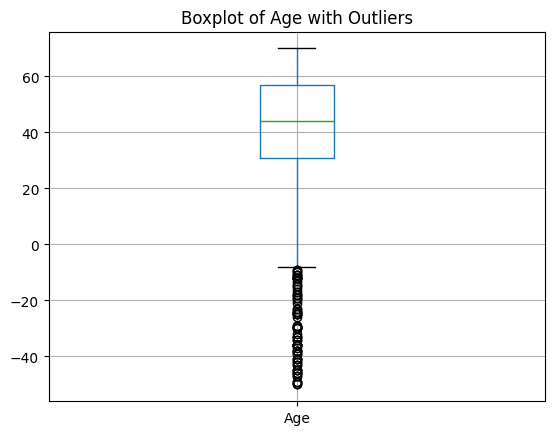

In [23]:
df.boxplot(column=['Age'])
plt.title("Boxplot of Age with Outliers")
plt.show()

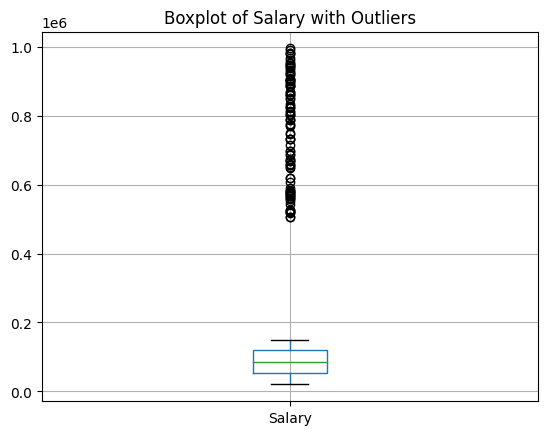

In [24]:
df.boxplot(column=['Salary'])
plt.title("Boxplot of Salary with Outliers")
plt.show()

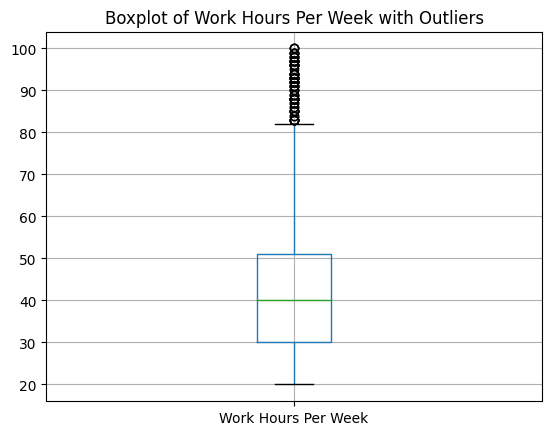

In [25]:
df.boxplot(column=['Work Hours Per Week'])
plt.title("Boxplot of Work Hours Per Week with Outliers")
plt.show()

In [26]:
print(df[df['Age'] < 0])

       Age    Salary  Work Hours Per Week  Gender  Education Level
272  -23.0   39812.0                 25.0       1                3
499   -7.0   70773.0                 47.0       1                1
516   -6.0  146933.0                 41.0       0                0
521  -37.0  135498.0                 29.0       0                1
550  -33.0  107585.0                 34.0       0                2
...    ...       ...                  ...     ...              ...
9173 -45.0   47928.0                 52.0       1                2
9323 -25.0   77083.0                 53.0       0                2
9407 -38.0   94747.0                 47.0       0                2
9408 -12.0   42742.0                 34.0       0                1
9796 -36.0   70003.0                 33.0       1                1

[98 rows x 5 columns]


In [27]:
df = df[df['Age'] >= 0]

In [28]:
# Menampilkan Nilai Minimum
print(df['Age'].min())

18.0


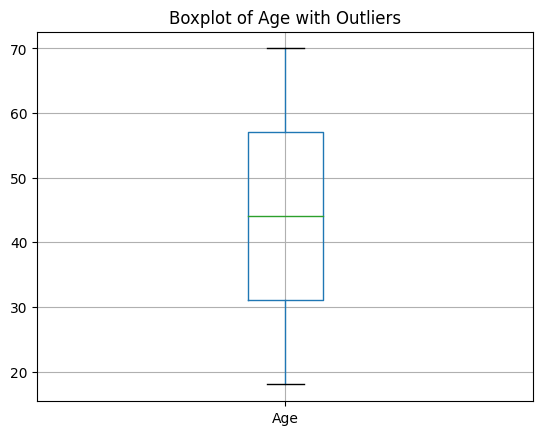

In [29]:
df.boxplot(column=['Age'])
plt.title("Boxplot of Age with Outliers")
plt.show()

In [30]:
lower_bound_salary = q1_salary - 1.5 * iqr_salary
upper_bound_salary = q3_salary + 1.5 * iqr_salary

df = df[(df['Salary'] >= lower_bound_salary) & (df['Salary'] <= upper_bound_salary)]

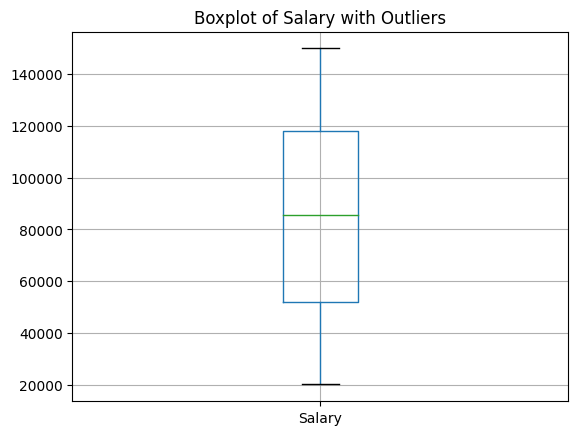

In [31]:
df.boxplot(column=['Salary'])
plt.title("Boxplot of Salary with Outliers")
plt.show()

In [32]:
lower_bound_WHPW = q1_WHPW - 1.0 * iqr_WHPW
upper_bound_WHPW = q3_WHPW + 1.0 * iqr_WHPW

df = df[(df['Work Hours Per Week'] >= lower_bound_WHPW) & (df['Work Hours Per Week'] <= upper_bound_WHPW)]

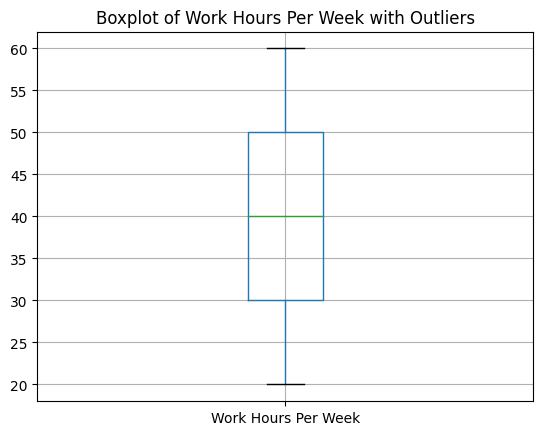

In [33]:
df.boxplot(column=['Work Hours Per Week'])
plt.title("Boxplot of Work Hours Per Week with Outliers")
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9364 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  9364 non-null   float64
 1   Salary               9364 non-null   float64
 2   Work Hours Per Week  9364 non-null   float64
 3   Gender               9364 non-null   int64  
 4   Education Level      9364 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 438.9 KB


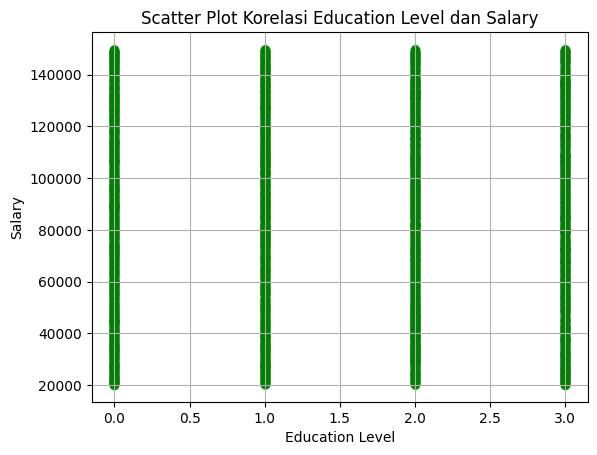

In [35]:
# Buat Scatter plot
plt.scatter( df['Education Level'], df['Salary'], color='green', alpha=0.2, marker='o')

# Tambahkan Label
plt.title('Scatter Plot Korelasi Education Level dan Salary')
plt.xlabel('Education Level')
plt.ylabel('Salary')

# Tampilkan plot
plt.grid(True)
plt.show()

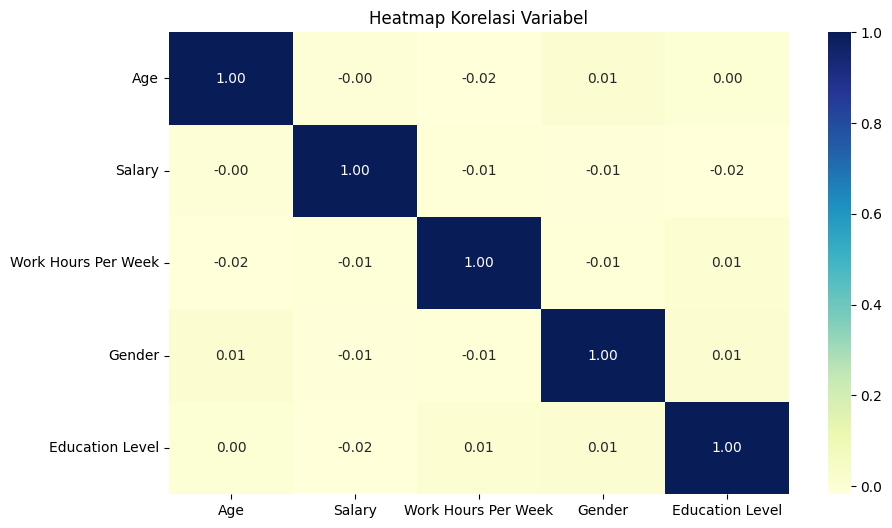

In [36]:
# Membuat  heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt=".2f")

plt.title("Heatmap Korelasi Variabel")
plt.show()